In [5]:
!pip install fastai
!pip install requests

In [6]:
from pathlib import Path
from fastai.vision.utils import download_images, verify_images, get_image_files
from fastai.data.external import URLs
import requests
from fastcore.foundation import L  # fastai's List class

# Function to search and download images using SerpApi
def search_images_serpapi(api_key, query, num_images=100):
    endpoint = "https://serpapi.com/search"
    image_urls = []
    params = {
        "engine": "google_images",
        "q": query,
        "api_key": api_key,
        "ijn": 0
    }
    while len(image_urls) < num_images:
        response = requests.get(endpoint, params=params)
        response.raise_for_status()
        results = response.json()
        if "images_results" not in results:
            break
        for image in results["images_results"]:
            image_urls.append(image["original"])
            if len(image_urls) == num_images:
                break
        params["ijn"] += 1
    return image_urls

# Your SerpApi API Key
API_KEY = "339517488034b1b9950bdfed7e391c141f6646d7fa64a34ebe4127aee42cf50d"

# List of LFC players
lfc_players = [
    "Mohamed Salah Liverpool", "Wataru Endo Liverpool", "Darwin Nuñez Liverpool", "Luis Díaz Liverpool",
    "Dominik Szoboszlai Liverpool", "Virgil van Dijk Liverpool", "Ryan Gravenberch Liverpool",
    "Alexis MacAllister Liverpool", "Trent Alexander-Arnold Liverpool", "Cody Gakpo Liverpool",
    "Diogo Jota Liverpool", "Thiago Alcântara Liverpool", "Alisson Becker Liverpool",
    "Andrew Robertson Liverpool", "Curtis Jones Liverpool",
    "Joël Matip Liverpool", "Ibrahima Konate Liverpool"
]

# Prepare directory
path = Path('lfc_players')
if not path.exists():
    path.mkdir()

# All image URLs will be collected here
all_image_urls = []

# Search and download images for each player
for player in lfc_players:
    dest = path/player
    dest.mkdir(exist_ok=True)
    image_urls = search_images_serpapi(API_KEY, player, num_images=60)
    download_images(dest, urls=L(image_urls))  # Ensure the URLs are in a List
    all_image_urls.extend(image_urls)  # Collect all image URLs

# Verify images and remove any that are corrupt
fns = get_image_files(path)
failed = verify_images(fns)
failed.map(Path.unlink)

# Now you can print all image URLs
for url in all_image_urls:
    print(url)

https://efe.com/wp-content/uploads/2024/01/rss-efeb033220fe8d476d3193729fc3a0335ec1ef507edw.jpg
https://backend.liverpoolfc.com/sites/default/files/styles/xs/public/2023-07/pp-23-24-mens-home-body-salah.webp?itok=hOje16Dr
https://e3.365dm.com/24/01/640x380/skysports-salah-liverpool-goal_6409568.jpg?20240101204355
https://i.guim.co.uk/img/media/15aafe79fe09f23c54088f6add1f916a63badd13/1156_881_3170_1902/master/3170.jpg?width=465&dpr=1&s=none
https://assets.goal.com/v3/assets/bltcc7a7ffd2fbf71f5/blt1a6bd9a425dbc33d/6406152119d3bd7183e6a591/Goal_HIC_-_LinkedIn_(2).jpg?auto=webp&format=pjpg&width=3840&quality=60
https://a.espncdn.com/photo/2024/0101/r1272569_1024x576_16-9.jpg
https://focus.sundayworld.com/thumbor/Otrn3C7WVZR07Yfm4NQ-DBwV_WU=/183x0:3056x2155/960x720/prod-mh-ireland/ee0e9a06-7e78-40ad-a21d-e63ed90f385d/ef4aae10-8b5b-4179-ad6c-bd1bd65fb962/ee0e9a06-7e78-40ad-a21d-e63ed90f385d.jpg
https://static.independent.co.uk/2023/08/19/17/INGLATERRA-LIGA_50782.jpg
https://d3j2s6hdd6a7rg.c

In [7]:
!pip install fastbook
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *

players = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 34.7 MB/s eta 0:00:00


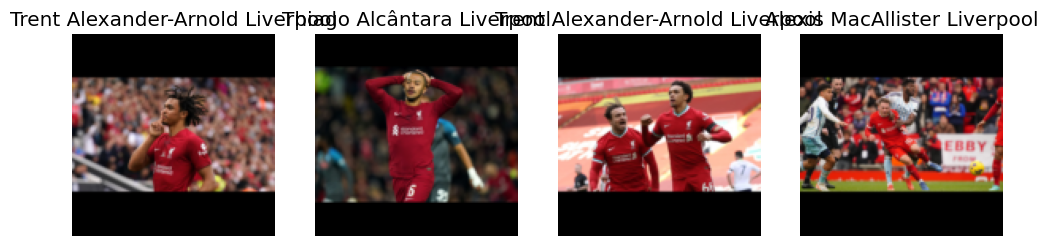

In [8]:
players = players.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = players.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)
     

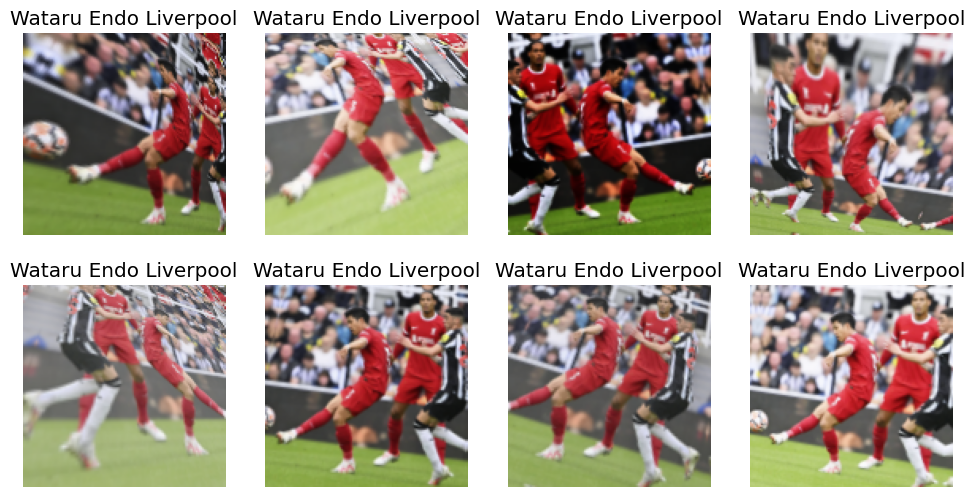

In [9]:
players = players.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = players.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [15]:

learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(40)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 83.0MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,4.212443,3.012778,0.861314,00:38


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,3.618342,2.703327,0.795620,00:38
1,3.439814,2.528695,0.777372,00:35
2,3.296007,2.368093,0.718978,00:36
3,3.217537,2.163195,0.649635,00:34
4,3.058057,1.982488,0.587591,00:35
5,2.884787,1.852282,0.558394,00:34
6,2.661540,1.740682,0.510949,00:36
7,2.461985,1.617581,0.456204,00:35
8,2.282525,1.501340,0.459854,00:37
9,2.076441,1.424230,0.405109,00:35


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes sh

<Figure size 1200x1200 with 0 Axes>

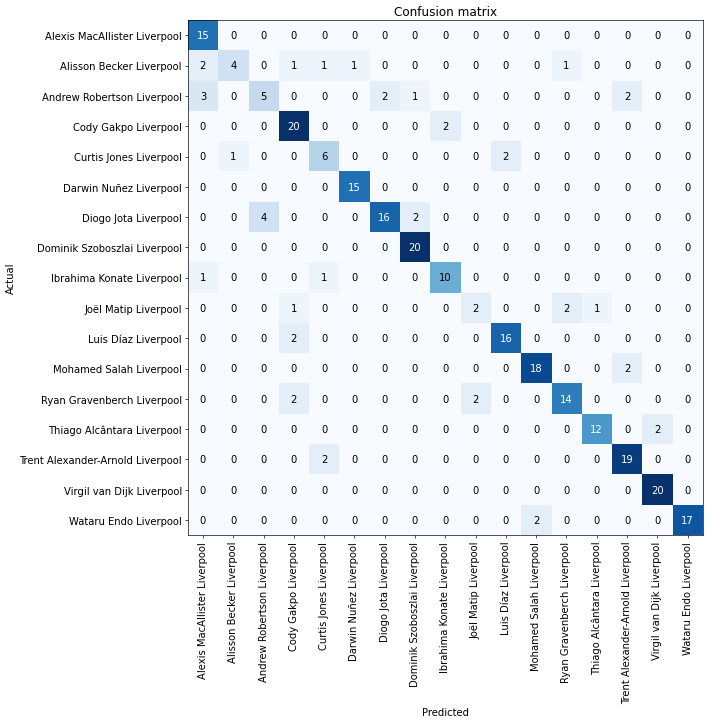

In [16]:
from fastai.vision.all import *

# Assuming 'learn' is your Learner object
interp = ClassificationInterpretation.from_learner(learn)

# Set a larger figure size
fig = plt.figure(figsize=(12, 12))  # You can adjust the size as needed

# Plot the confusion matrix with adjusted figure size
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

# Optionally, rotate the x-axis labels to prevent overlap
plt.xticks(rotation=90)

# Decrease font size
plt.rcParams.update({'font.size': 8})

# Show the plot with adjustments
plt.show()


<Figure size 1200x600 with 0 Axes>

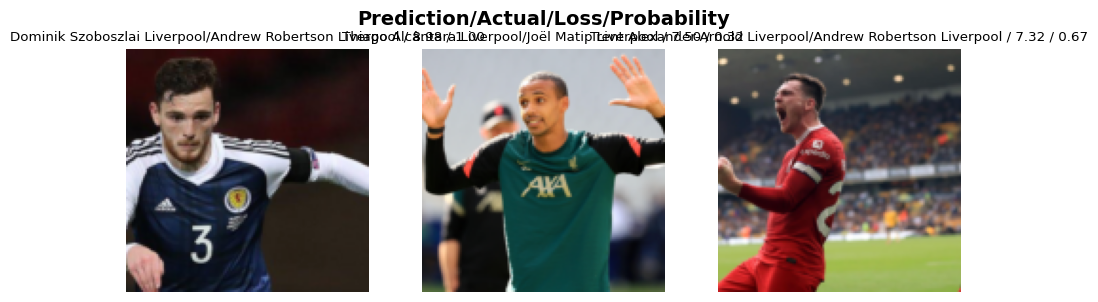

In [28]:
# Set a reasonable figure size
fig = plt.figure(figsize=(12, 6))

# Plot the top losses
interp.plot_top_losses(3, nrows=1)

# Adjust the layout
plt.tight_layout()

# If the labels are still too large and overlapping, you can adjust them further
plt.subplots_adjust(top=0.85)  # Adjust this value as needed to fit

# You may also want to reduce the font size for the titles in the images
for ax in fig.axes:
    for item in [ax.title, ax.xaxis.label, ax.yaxis.label]:
        item.set_fontsize(10)  # Adjust font size here
    for item in ax.get_xticklabels() + ax.get_yticklabels():
        item.set_fontsize(8)  # Adjust font size here

plt.show()

In [21]:
learn.export()

path = Path()
path.ls(file_exts='.pkl')
learn_inf = load_learner(path/'export.pkl')
learn_inf.dls.vocab

['Alexis MacAllister Liverpool', 'Alisson Becker Liverpool', 'Andrew Robertson Liverpool', 'Cody Gakpo Liverpool', 'Curtis Jones Liverpool', 'Darwin Nuñez Liverpool', 'Diogo Jota Liverpool', 'Dominik Szoboszlai Liverpool', 'Ibrahima Konate Liverpool', 'Joël Matip Liverpool', 'Luis Díaz Liverpool', 'Mohamed Salah Liverpool', 'Ryan Gravenberch Liverpool', 'Thiago Alcântara Liverpool', 'Trent Alexander-Arnold Liverpool', 'Virgil van Dijk Liverpool', 'Wataru Endo Liverpool']